# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

df = pd.read_csv('../assets/billboard.csv')

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data provided above in the Billboard.csv file is an aggregation Billboard music rankings from the aughts. Organized by Artist, information about the track that was on the charts (time, genre) and information about the time on charts (date entering chats, date of highest position and weeks on charts). 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [2]:
## Fixing artist names so that they are in order and look clean ##

def nameswitch(value):
   if "," in value:
       for i in range(len(value)):
           if value[i] == ",":
               return value[i+2:len(value)] + " " + value[:i] 
   else:
       return value

df['artist.inverted'] = df['artist.inverted'].to_frame().applymap(nameswitch)

## Fixing dates so thay they are in 'datetime' formatting ##

df['date.entered'] = pd.to_datetime(df['date.entered'])
df['date.peaked'] = pd.to_datetime(df['date.peaked'])

## Fixing times so they are more readable as track lengths ##

def timeswitch(value):
    return '0' + value[0] + ':' + value[2:4]
           
df['time'] = df['time'].to_frame().applymap(timeswitch)

## removing spaces from genre column ##

df['genre'] = df['genre'].map(lambda x: x.replace(' ', ''))

## Replacing all * with np.nan values ##

def replace_null(value):
    if value == '*':
        return np.nan
    else:
        return value
    
df = df.applymap(replace_null)

## Counting weeks in charts ##

def countweeks(n):
    weeks = n.value_counts().sum()
    return weeks

df['weeks_on_charts'] = df.iloc[:,7:].apply(countweeks, axis=1)



In [3]:
df.head()

year     artist.inverted                                  track   time  \
0  2000     Destiny's Child               Independent Women Part I  03:38   
1  2000             Santana                           Maria, Maria  04:18   
2  2000       Savage Garden                     I Knew I Loved You  04:07   
3  2000             Madonna                                  Music  03:45   
4  2000  Christina Aguilera  Come On Over Baby (All I Want Is You)  03:38   

  genre date.entered date.peaked  x1st.week x2nd.week x3rd.week  \
0  Rock   2000-09-23  2000-11-18         78        63        49   
1  Rock   2000-02-12  2000-04-08         15         8         6   
2  Rock   1999-10-23  2000-01-29         71        48        43   
3  Rock   2000-08-12  2000-09-16         41        23        18   
4  Rock   2000-08-05  2000-10-14         57        47        45   

        ...       x68th.week x69th.week x70th.week x71st.week x72nd.week  \
0       ...              NaN        NaN        NaN        NaN        NaN   
1       ...              NaN        NaN        NaN        NaN        NaN   
2       ...              NaN        NaN        NaN        NaN        NaN   
3       ...              NaN        NaN        NaN        NaN        NaN   
4       ...              NaN        NaN        NaN        NaN        NaN   

  x73rd.week x74th.week x75th.week x76th.week weeks_on_charts  
0        NaN        NaN        NaN        NaN              28  
1        NaN        NaN        NaN        NaN              26  
2        NaN        NaN        NaN        NaN              33  
3        NaN        NaN        NaN        NaN              24  
4        NaN        NaN        NaN        NaN              21  

[5 rows x 84 columns]

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [4]:
## Melting the face off of my data ##

weekly_rankings = pd.melt(df, id_vars=['artist.inverted','track', 'genre', 'time'], value_vars=['x1st.week', 'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x55th.week', u'x56th.week',
       u'x57th.week', u'x58th.week', u'x59th.week', u'x60th.week',
       u'x61st.week', u'x62nd.week', u'x63rd.week', u'x64th.week',
       u'x65th.week', u'x66th.week', u'x67th.week', u'x68th.week',
       u'x69th.week', u'x70th.week', u'x71st.week', u'x72nd.week',
       u'x73rd.week', u'x74th.week', u'x75th.week', u'x76th.week'], var_name='week', value_name='rank')

## changing the name of Weeks so they are easier to organize ##

def weekfunc(value):
    if value[2] in '0123456789':
        return value[1:3]
    else: return value[1]
    
## formatting and changing datatypes for new week / rank columns ##     
    
weekly_rankings['week'] = weekly_rankings['week'].apply(weekfunc)
weekly_rankings = weekly_rankings.dropna()
weekly_rankings['week'] = weekly_rankings['week'].astype(int)
weekly_rankings['rank'] = weekly_rankings['rank'].astype(int)
weekly_rankings = weekly_rankings.sort_values(['track', 'week'])

## reformatting time without colon so can sort it as an Int ##

weekly_rankings['time'] = weekly_rankings['time'].map(lambda x: x.replace(':', ''))
weekly_rankings['time'] = weekly_rankings['time'].astype('int')

## adding Bool statement showing True for all songs over 4 minutes

weekly_rankings['over_four_min'] = weekly_rankings['time'].apply(lambda x: x >= 400)

weekly_rankings.head(30)

artist.inverted                       track genre  time  week  rank  \
47             Nelly  (Hot S**t) Country Grammar   Rap   417     1   100   
364            Nelly  (Hot S**t) Country Grammar   Rap   417     2    99   
681            Nelly  (Hot S**t) Country Grammar   Rap   417     3    96   
998            Nelly  (Hot S**t) Country Grammar   Rap   417     4    76   
1315           Nelly  (Hot S**t) Country Grammar   Rap   417     5    55   
1632           Nelly  (Hot S**t) Country Grammar   Rap   417     6    37   
1949           Nelly  (Hot S**t) Country Grammar   Rap   417     7    24   
2266           Nelly  (Hot S**t) Country Grammar   Rap   417     8    24   
2583           Nelly  (Hot S**t) Country Grammar   Rap   417     9    30   
2900           Nelly  (Hot S**t) Country Grammar   Rap   417    10    36   
3217           Nelly  (Hot S**t) Country Grammar   Rap   417    11    37   
3534           Nelly  (Hot S**t) Country Grammar   Rap   417    12    30   
3851           Nelly  (Hot S**t) Country Grammar   Rap   417    13    23   
4168           Nelly  (Hot S**t) Country Grammar   Rap   417    14    21   
4485           Nelly  (Hot S**t) Country Grammar   Rap   417    15    17   
4802           Nelly  (Hot S**t) Country Grammar   Rap   417    16    17   
5119           Nelly  (Hot S**t) Country Grammar   Rap   417    17    15   
5436           Nelly  (Hot S**t) Country Grammar   Rap   417    18    11   
5753           Nelly  (Hot S**t) Country Grammar   Rap   417    19    11   
6070           Nelly  (Hot S**t) Country Grammar   Rap   417    20    10   
6387           Nelly  (Hot S**t) Country Grammar   Rap   417    21     7   
6704           Nelly  (Hot S**t) Country Grammar   Rap   417    22     7   
7021           Nelly  (Hot S**t) Country Grammar   Rap   417    23     8   
7338           Nelly  (Hot S**t) Country Grammar   Rap   417    24    10   
7655           Nelly  (Hot S**t) Country Grammar   Rap   417    25    11   
7972           Nelly  (Hot S**t) Country Grammar   Rap   417    26    12   
8289           Nelly  (Hot S**t) Country Grammar   Rap   417    27    12   
8606           Nelly  (Hot S**t) Country Grammar   Rap   417    28    17   
8923           Nelly  (Hot S**t) Country Grammar   Rap   417    29    19   
9240           Nelly  (Hot S**t) Country Grammar   Rap   417    30    23   

     over_four_min  
47            True  
364           True  
681           True  
998           True  
1315          True  
1632          True  
1949          True  
2266          True  
2583          True  
2900          True  
3217          True  
3534          True  
3851          True  
4168          True  
4485          True  
4802          True  
5119          True  
5436          True  
5753          True  
6070          True  
6387          True  
6704          True  
7021          True  
7338          True  
7655          True  
7972          True  
8289          True  
8606          True  
8923          True  
9240          True

In [5]:
weekly_rankings.genre.value_counts()

Rock           1773
Country        1200
Rap             837
Rock'n'roll     814
R&B             261
Latin           173
Pop             137
Electronica      72
Gospel           20
Reggae           15
Jazz              5
Name: genre, dtype: int64

In [6]:
## look at avg position on chart for songs that are over / under 4 min ... by genre 

pd.pivot_table(weekly_rankings, index=['over_four_min', 'genre'], values=['rank', 'week'], aggfunc=[np.mean,np.max, np.min])

mean            amax      amin     
                                rank       week rank week rank week
over_four_min genre                                                
False         Country      63.113325   9.404732  100   25   11    1
              Electronica  61.675000  10.500000   98   20    6    1
              Latin        42.767241  12.672414   94   32    1    1
              Pop          51.981982   9.846847  100   29    5    1
              R&B          67.707792   8.298701  100   20   14    1
              Rap          57.640957   8.859043  100   22    5    1
              Rock         40.621818  12.547879  100   53    1    1
              Rock'n'roll  27.977208  13.965812  100   47    1    1
True          Country      58.803526  12.690176  100   64    1    1
              Electronica  64.312500   9.000000   95   20   27    1
              Gospel       67.750000  10.500000   89   20   57    1
              Jazz         51.800000   3.000000   89    5    7    1
              Latin        57.596491   8.842105  100   19   12    1
              Pop          67.692308  12.192308   99   27   24    1
              R&B          67.523364   7.037383  100   17   19    1
              Rap          55.091106  11.548807  100   53    2    1
              Reggae       72.400000   8.000000   95   15   54    1
              Rock         51.793249  10.768987  100   39    1    1
              Rock'n'roll  36.190065  16.628510  100   65    1    1

In [7]:
## creating data frames for everything over and under 4 min 
## 4 minutes is even marker because there are 
## 2,531 entries over 4 minutes, and
## 2,776 entries under 4 minutes

under_four = weekly_rankings[weekly_rankings['over_four_min'] == False]
over_four = weekly_rankings[weekly_rankings['over_four_min'] == True]

In [8]:
## creating comparisons by 4 min marker for 8 common genres (genres present in both over/under 4 min):
## Country, Electronica, Latin, Pop, R&B, Rap, Rock, Rock'n'roll
## so from over_four, need to remove Gospel, Jazz and Reggae. Will justify in blog post

#over_four = over_four[over_four.genre.map(lambda x: x not in ['Jazz', 'Reggae', 'Gospel'])]

over_four = over_four[~over_four['genre'].isin(['Jazz', 'Reggae', 'Gospel'])]

In [9]:
under_four_median = pd.pivot_table(under_four, index=['genre', 'week'], values=['rank'], aggfunc=[np.median])
under_four_median.head()

median
               rank
genre   week       
Country 1      82.0
        2      76.0
        3      71.0
        4      67.0
        5      63.0

In [10]:
over_four_median = pd.pivot_table(over_four, index=['genre', 'week'], values=['rank'], aggfunc=[np.median])

In [42]:
## creating pivot table showing the values for how many songs were present at each week per genre.
## originally added this into my median pivot table but that threw off my graphs below so it was just easier to 
## create it's own PT. 
## will now hopefully be able to use this to make relative sizing for markers on my line graphs below. 

over_four_len = pd.pivot_table(over_four, index=['genre', 'week'], values=['rank'], aggfunc=[len])
under_four_len = pd.pivot_table(under_four, index=['genre', 'week'], values=['rank'], aggfunc=[len])

under_four_len.head()

len
             rank
genre   week     
Country 1      51
        2      51
        3      50
        4      49
        5      48

In [11]:
pd.pivot_table(under_four, index=['genre'], values=['rank', 'week'], aggfunc=[np.mean,np.max, np.min, np.median])

mean            amax      amin      median      
                  rank       week rank week rank week   rank  week
genre                                                             
Country      63.113325   9.404732  100   25   11    1   63.0   9.0
Electronica  61.675000  10.500000   98   20    6    1   88.0  10.5
Latin        42.767241  12.672414   94   32    1    1   38.0  12.0
Pop          51.981982   9.846847  100   29    5    1   50.0   9.0
R&B          67.707792   8.298701  100   20   14    1   69.0   8.0
Rap          57.640957   8.859043  100   22    5    1   57.0   8.0
Rock         40.621818  12.547879  100   53    1    1   34.0  11.0
Rock'n'roll  27.977208  13.965812  100   47    1    1   19.0  13.0

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

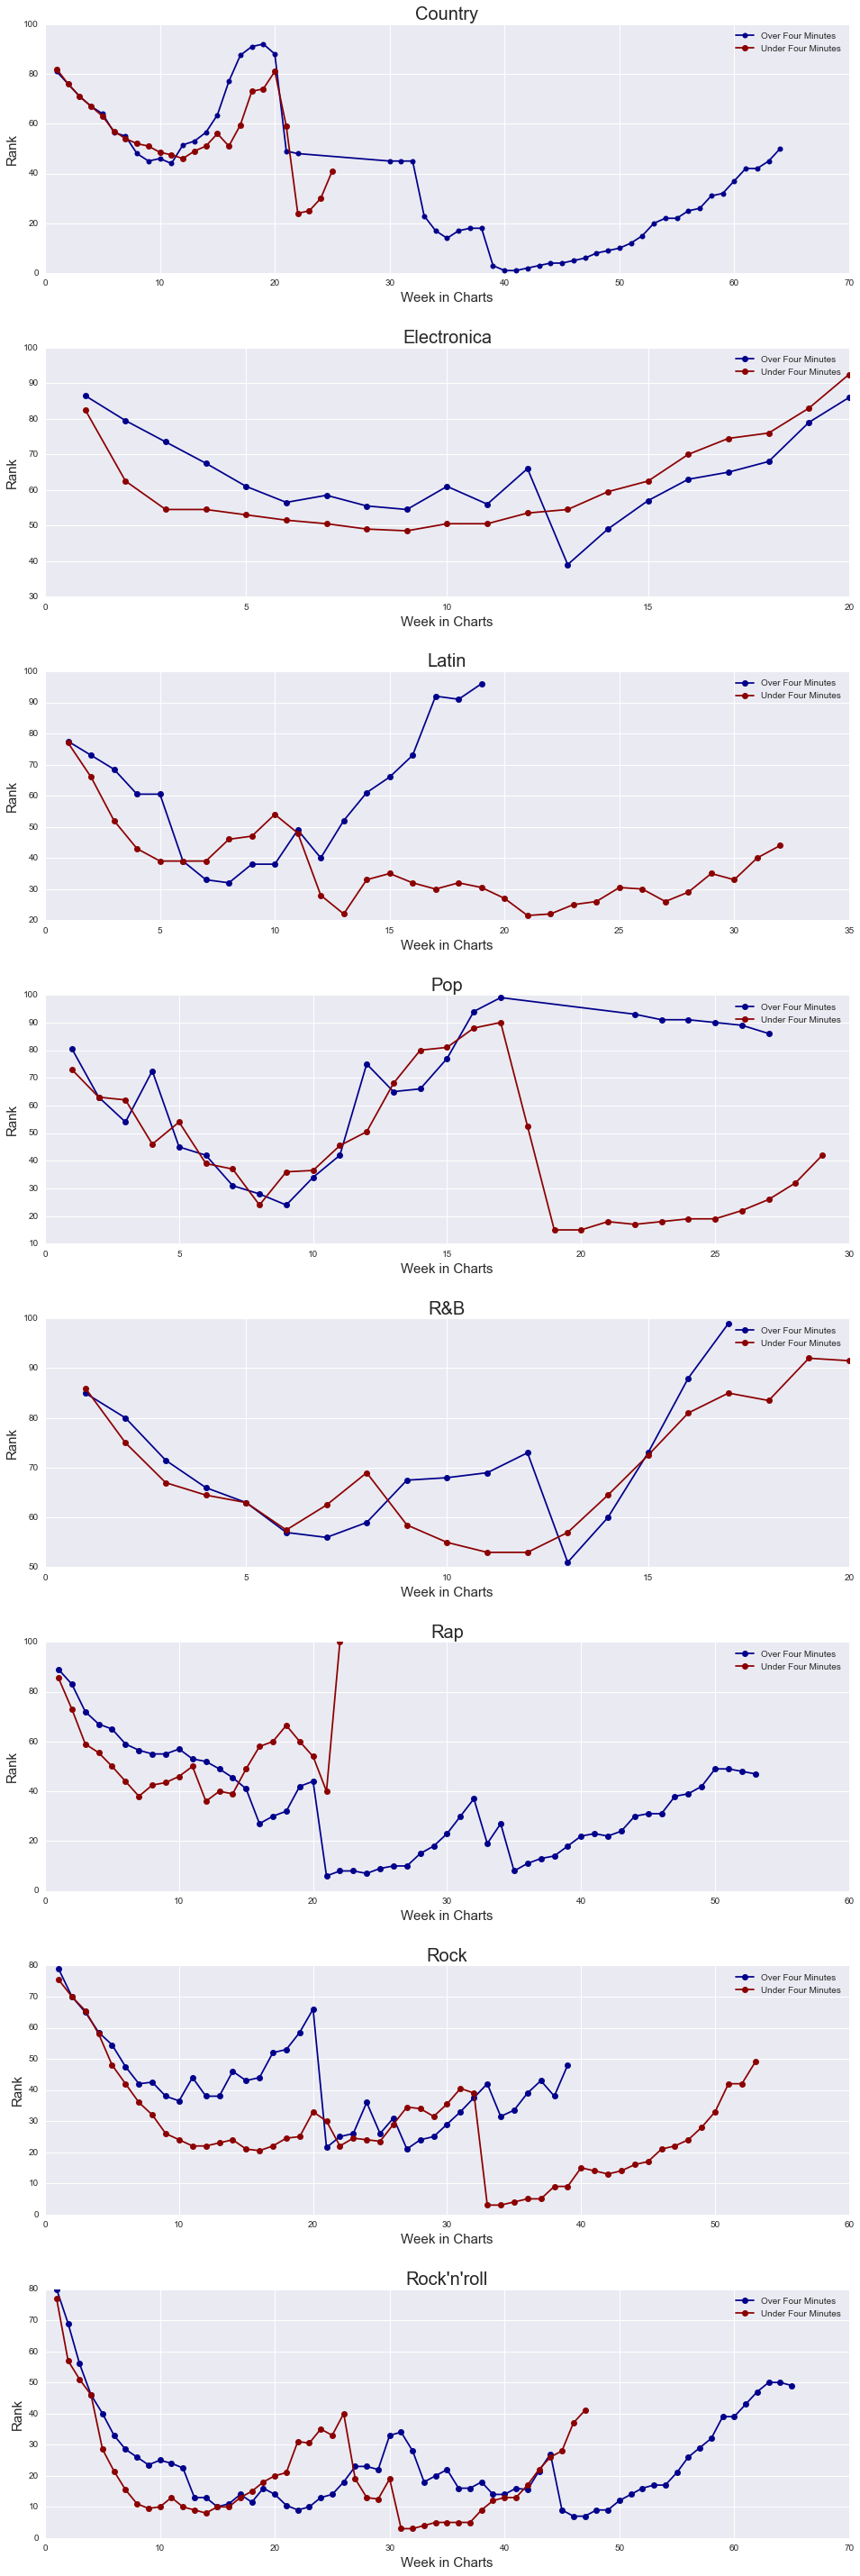

In [83]:
## creating subplots 8 by 1 (length of genres being studied)
fig, axes = plt.subplots(8,1, figsize=(16,50))
axes_details = type(axes)
fig_details = type(fig)
fig.subplots_adjust(hspace=.3)

## setting titles 
axes[0].set_title('Country', fontsize=20)
axes[1].set_title('Electronica', fontsize=20)
axes[2].set_title('Latin', fontsize=20)
axes[3].set_title('Pop', fontsize=20)
axes[4].set_title('R&B', fontsize=20)
axes[5].set_title('Rap', fontsize=20)
axes[6].set_title('Rock', fontsize=20)
axes[7].set_title("Rock'n'roll", fontsize=20)

#over_four_median.loc['Country']
#np.arange(len(over_four_median.loc['Country']))
#axes[0].scatter(x=np.arange(len(over_four_median.loc['Country'])), y=over_four_median.loc['Country'])
#axes[0].scatter(x=np.arange(len(under_four_median.loc['Country'])), y=under_four_median.loc['Country'], c='red')

axes[0].plot(over_four_median.loc['Country'], marker='o', c='darkblue', ms =6, label='Over Four Minutes')
axes[0].plot(under_four_median.loc['Country'], marker='o', c='darkred', label='Under Four Minutes')
axes[0].set_ylabel('Rank', fontsize = 15)
axes[0].set_xlabel('Week in Charts', fontsize = 15)
axes[0].legend()

axes[1].plot(over_four_median.loc['Electronica'], marker='o', c='darkblue', label='Over Four Minutes')
axes[1].plot(under_four_median.loc['Electronica'], marker='o', c='darkred', label='Under Four Minutes')
axes[1].set_ylabel('Rank', fontsize = 15)
axes[1].set_xlabel('Week in Charts', fontsize = 15)
axes[1].legend()

axes[2].plot(over_four_median.loc['Latin'], marker='o', c='darkblue', label='Over Four Minutes')
axes[2].plot(under_four_median.loc['Latin'], marker='o', c='darkred', label='Under Four Minutes')
axes[2].set_ylabel('Rank', fontsize = 15)
axes[2].set_xlabel('Week in Charts', fontsize = 15)
axes[2].legend()

axes[3].plot(over_four_median.loc['Pop'], marker='o', c='darkblue', label='Over Four Minutes')
axes[3].plot(under_four_median.loc['Pop'], marker='o', c='darkred', label='Under Four Minutes')
axes[3].set_ylabel('Rank', fontsize = 15)
axes[3].set_xlabel('Week in Charts', fontsize = 15)
axes[3].legend()

axes[4].plot(over_four_median.loc['R&B'], marker='o', c='darkblue', label='Over Four Minutes')
axes[4].plot(under_four_median.loc['R&B'], marker='o', c='darkred', label='Under Four Minutes')
axes[4].set_ylabel('Rank', fontsize = 15)
axes[4].set_xlabel('Week in Charts', fontsize = 15)
axes[4].legend()

axes[5].plot(over_four_median.loc['Rap'], marker='o', c='darkblue', label='Over Four Minutes')
axes[5].plot(under_four_median.loc['Rap'], marker='o', c='darkred', label='Under Four Minutes')
axes[5].set_ylabel('Rank', fontsize = 15)
axes[5].set_xlabel('Week in Charts', fontsize = 15)
axes[5].legend()

axes[6].plot(over_four_median.loc['Rock'], marker='o', c='darkblue', label='Over Four Minutes')
axes[6].plot(under_four_median.loc['Rock'], marker='o', c='darkred', label='Under Four Minutes')
axes[6].set_ylabel('Rank', fontsize = 15)
axes[6].set_xlabel('Week in Charts', fontsize = 15)
axes[6].legend()

axes[7].plot(over_four_median.loc["Rock'n'roll"], marker='o', c='darkblue', label='Over Four Minutes')
axes[7].plot(under_four_median.loc["Rock'n'roll"], marker='o', c='darkred', label='Under Four Minutes')
axes[7].set_ylabel('Rank', fontsize = 15)
axes[7].set_xlabel('Week in Charts', fontsize = 15)
axes[7].legend()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

**Problem Statement:**

What makes a hit? I'm going to delve into our Billboard music data set to try and quantify the characteristics of a hit (measured both by magnitude and longevity of rank). Through this I will attempt to be able to identify the skeleton requirements of a song that will crack the charts. 

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- clean data 
- group into categories that are comparable 
    - i.e., similar genres
- seperate comparable items into opposing views
    - for my test, I have chosen length of song. I believe that song length says a lot about the approach taken
      as well as the genre it is coming from (i.e., a 8 minute pop song would be a lot more abnormal than an 8 minute 
      rock song). I believe through this we will start to be able to see trends and consumer value on types and
      frameworks of music 
- evaluate output to derive a conclussion on the data. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

Blog post can be viewed at:

http://tuckercs.github.io/A_Study_of_Length/

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 